# Importing Imp librareies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
from pandas import DataFrame

# Importing  and exploring dataset

In [2]:
df=pd.read_csv("Anxiety Research.csv")
# to show top 5 rows
df.head()

,#,Could you be suffering with anxiety?,Education,Age,Gender,Race/Ethnicity,Occupation,Underlying Conditions,Smoker,Have you received professional treatment?,If not what factors kept you from seeking professional help
0,1,No,1 year of college,25-34,F,Hispanic_or_Latino,Healthcare,No,No,NaN,NaN
1,2,yes,2 years of college,18-24,F,Asian_or_Asian_American,Business and Financial,Obesity,No,No,Cultural Expectations
2,3,yes,Graduated from college,18-24,M,Asian_or_Asian_American,Computer/IT,Obesity,No,No,Cost
3,4,yes,3 years of college,18-24,F,Asian_or_Asian_American,Healthcare,No,No,No,Coping Mechanisms
4,5,no,Graduated from college,25-34,F,Asian_or_Asian_American,Healthcare,No,Yes,NaN,NaN


In [3]:
# to show bottom 5 rows
df.tail()

,#,Could you be suffering with anxiety?,Education,Age,Gender,Race/Ethnicity,Occupation,Underlying Conditions,Smoker,Have you received professional treatment?,If not what factors kept you from seeking professional help
35,36,Yes,Completed graduate school,25-34,M,White_or_Caucasian,Healthcare,Obesity,Yes,no,Did not know where to get help
36,37,yes,Graduated from college,25-34,M,Hispanic_or_Latino,Legal,Lung Disease,No,no,Covid-19
37,38,no,Graduated from high school,Under 18,M,Hispanic_or_Latino,Education/Training,Other,No,NaN,NaN
38,39,yes,Graduated from college,25-34,M,Asian_or_Asian_American,Social Services,Obesity,Yes,No,School
39,40,Yes,Graduated from college,25-34,M,Hispanic_or_Latino,Construction,Obeisty,No,no,"money, did not know where to get the help"


In [4]:
#to see shape , no of rows and colums
df.shape

(40, 11)

In [5]:
# to check how details regarding dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
#                                                              40 non-null int64
Could you be suffering with anxiety?                           40 non-null object
Education                                                      40 non-null object
Age                                                            40 non-null object
Gender                                                         40 non-null object
Race/Ethnicity                                                 40 non-null object
Occupation                                                     40 non-null object
Underlying Conditions                                          40 non-null object
Smoker                                                         40 non-null object
Have you received professional treatment?                      35 non-null object
If not what factors kept you from seeking professional help    28 non-null obj

In [6]:
# to check details of statics upon dataset
df.describe(include=object)

,Could you be suffering with anxiety?,Education,Age,Gender,Race/Ethnicity,Occupation,Underlying Conditions,Smoker,Have you received professional treatment?,If not what factors kept you from seeking professional help
count,40,40,40,40,40,40,40,40,35,28
unique,4,8,7,2,6,12,10,2,8,25
top,yes,Graduated from college,25-34,F,Asian_or_Asian_American,Healthcare,Other,No,No,Cultural Expectations
freq,22,17,18,23,17,14,12,30,12,2


# Data Cleaning

In [7]:
# change some column names 
df.rename(columns={'#': 'Index',
                                   'Could you be suffering with anxiety?':'Suffering_With_Anxiety',
                                  'Have you received professional treatment?':'Received_Professional_Treatment',
                   'Race/Ethnicity':'Ethnicity',
                   'Underlying Conditions':'Underlying_Conditions','If not what factors kept you from seeking professional help':'Factors_Kept_You_From_Seeking_Professional_Help'}, inplace=True)

In [8]:
df.head()


,Index,Suffering_With_Anxiety,Education,Age,Gender,Ethnicity,Occupation,Underlying_Conditions,Smoker,Received_Professional_Treatment,Factors_Kept_You_From_Seeking_Professional_Help
0,1,No,1 year of college,25-34,F,Hispanic_or_Latino,Healthcare,No,No,NaN,NaN
1,2,yes,2 years of college,18-24,F,Asian_or_Asian_American,Business and Financial,Obesity,No,No,Cultural Expectations
2,3,yes,Graduated from college,18-24,M,Asian_or_Asian_American,Computer/IT,Obesity,No,No,Cost
3,4,yes,3 years of college,18-24,F,Asian_or_Asian_American,Healthcare,No,No,No,Coping Mechanisms
4,5,no,Graduated from college,25-34,F,Asian_or_Asian_American,Healthcare,No,Yes,NaN,NaN


In [9]:
df.count()

Index                                              40
Suffering_With_Anxiety                             40
Education                                          40
Age                                                40
Gender                                             40
Ethnicity                                          40
Occupation                                         40
Underlying_Conditions                              40
Smoker                                             40
Received_Professional_Treatment                    35
Factors_Kept_You_From_Seeking_Professional_Help    28
dtype: int64

In [10]:
#to show null
print (df.isnull().sum())
print ("Total Missing values: " + str(df.isnull().sum().sum()))

Index                                               0
Suffering_With_Anxiety                              0
Education                                           0
Age                                                 0
Gender                                              0
Ethnicity                                           0
Occupation                                          0
Underlying_Conditions                               0
Smoker                                              0
Received_Professional_Treatment                     5
Factors_Kept_You_From_Seeking_Professional_Help    12
dtype: int64
Total Missing values: 17


 <b> We have null values in ['Received_Professional_Treatment '] and ['Factors_Kept_You_From_Seeking_Professional_Help ']so we will not consider these two columns </b>

In [11]:
df['Gender'].value_counts()

F    23
M    17
Name: Gender, dtype: int64

In [12]:
df['Ethnicity'].value_counts()

Asian_or_Asian_American       17
Black_or_African_American      9
Hispanic_or_Latino             7
White_or_Caucasian             5
Hispanic or Latino             1
White or Caucasian             1
Name: Ethnicity, dtype: int64

In [13]:
df['Occupation'].value_counts()

Healthcare                14
Computer/IT                5
Unemployed                 3
Sales                      3
Construction               3
Education/Training         3
Other                      3
Enginerring                2
Legal                      1
Arts/Design                1
Social Services            1
Business and Financial     1
Name: Occupation, dtype: int64

In [14]:
# Remove Non needed row
df = df[df.Occupation != 'Other' ] 

In [15]:
df.shape

(37, 11)

In [16]:
df['Age'].value_counts()

25-34       17
35-44        6
18-24        6
55-64        4
45-54        2
Under 18     1
65+          1
Name: Age, dtype: int64

In [17]:
# use index =1 to count total numbers
df['Index'] = 1


In [18]:
df.head()

,Index,Suffering_With_Anxiety,Education,Age,Gender,Ethnicity,Occupation,Underlying_Conditions,Smoker,Received_Professional_Treatment,Factors_Kept_You_From_Seeking_Professional_Help
0,1,No,1 year of college,25-34,F,Hispanic_or_Latino,Healthcare,No,No,NaN,NaN
1,1,yes,2 years of college,18-24,F,Asian_or_Asian_American,Business and Financial,Obesity,No,No,Cultural Expectations
2,1,yes,Graduated from college,18-24,M,Asian_or_Asian_American,Computer/IT,Obesity,No,No,Cost
3,1,yes,3 years of college,18-24,F,Asian_or_Asian_American,Healthcare,No,No,No,Coping Mechanisms
4,1,no,Graduated from college,25-34,F,Asian_or_Asian_American,Healthcare,No,Yes,NaN,NaN


In [19]:
df["Suffering_With_Anxiety"].replace({"no": "No","yes":"Yes"}, inplace=True)
df["Smoker"].replace({"no": "No","yes":"Yes","No":"No"}, inplace=True)

# Research work , Analysis

# Q1- Find total number of all age people having anxiety also show with bar graph

In [20]:

query_1 = '''SELECT sum("Index") as total , "Age"  FROM df where "Suffering_With_Anxiety" = "Yes"  group by "Age";'''

res_1 = pysqldf(query_1)
res_1

,total,Age
0,6,18-24
1,11,25-34
2,5,35-44
3,2,45-54
4,3,55-64
5,1,65+


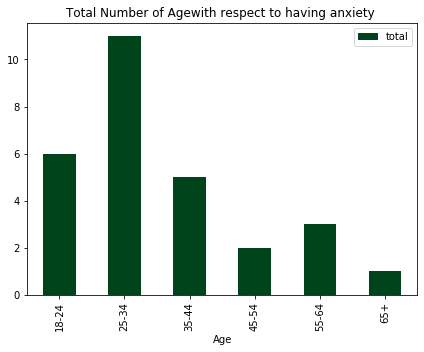

In [21]:

#using bar graph for visualize and analysis

res_1.plot.bar(x='Age', y='total' , colormap='BuGn_r', title='Total Number of Agewith respect to having anxiety ')
plt.gcf().set_size_inches(7, 5)

plt.show()

# Q2- Find total number of all age people having  no anxiety also show with bar graph

In [22]:
query_2 = '''SELECT sum("Index") as total , "Age"  FROM df where "Suffering_With_Anxiety" = "No"  group by "Age";'''

res_2 = pysqldf(query_2)
res_2

,total,Age
0,6,25-34
1,1,35-44
2,1,55-64
3,1,Under 18


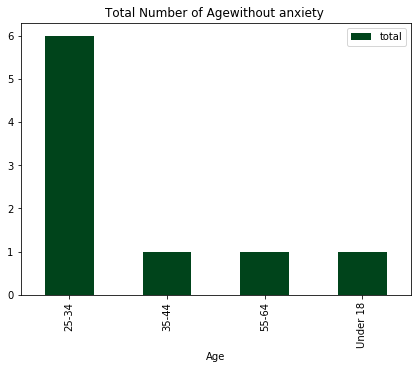

In [23]:
res_2.plot.bar(x='Age', y='total' , colormap='BuGn_r', title='Total Number of Agewithout anxiety ')
plt.gcf().set_size_inches(7, 5)

plt.show()

# Q- 3 find the total number of males and females having anxiety with visualization

In [24]:

query_3 = '''SELECT sum("Index") as total , Gender  FROM df where "Suffering_With_Anxiety" = "Yes"   group by "Gender";'''

res_3 = pysqldf(query_3)
res_3

,total,Gender
0,13,F
1,15,M


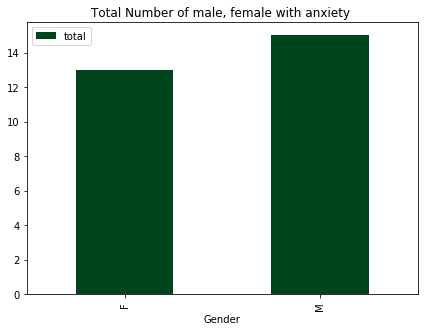

In [25]:
res_3.plot.bar(x='Gender', y='total' , colormap='BuGn_r', title='Total Number of male, female with anxiety ')
plt.gcf().set_size_inches(7, 5)

plt.show()

# Q- 4 find the total number of males and females without anxiety with visualization

In [26]:

query_4 = '''SELECT sum("Index") as total , Gender  FROM df where "Suffering_With_Anxiety" = "No"   group by "Gender";'''

res_4 = pysqldf(query_4)
res_4

,total,Gender
0,7,F
1,2,M


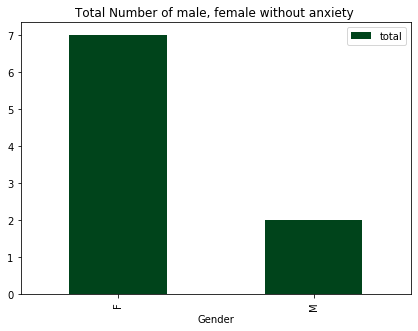

In [27]:
res_4.plot.bar(x='Gender', y='total' , colormap='BuGn_r', title='Total Number of male, female without anxiety ')
plt.gcf().set_size_inches(7, 5)

plt.show()

# Q- 5 find the total number of male and females who are smokers

In [28]:

query_5 = '''SELECT sum("Index") as total , Gender  FROM df where "Smoker" = "Yes"   group by "Gender";'''

res_5 = pysqldf(query_5)
res_5

,total,Gender
0,3,F
1,7,M


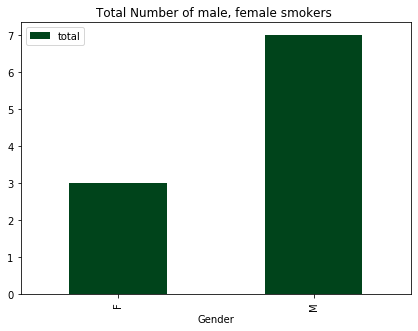

In [29]:
res_5.plot.bar(x='Gender', y='total' , colormap='BuGn_r', title='Total Number of male, female smokers ')
plt.gcf().set_size_inches(7, 5)

plt.show()

# Q6- find the total number of ethinicity where Gender is Male with visualization

In [30]:

query_6 = '''SELECT sum("Index") as total ,Ethnicity  FROM df where "Gender" = "M"   group by "Ethnicity";'''

res_6 = pysqldf(query_6)
res_6

,total,Ethnicity
0,6,Asian_or_Asian_American
1,3,Black_or_African_American
2,5,Hispanic_or_Latino
3,1,White or Caucasian
4,2,White_or_Caucasian


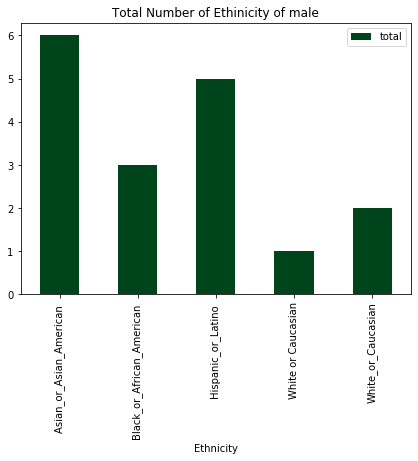

In [31]:
res_6.plot.bar(x='Ethnicity', y='total' , colormap='BuGn_r', title='Total Number of Ethinicity of male')
plt.gcf().set_size_inches(7, 5)

plt.show()

In [32]:
# Q7- find the total number of ethinicity where Gender is Female with visualization

In [33]:

query_7 = '''SELECT sum("Index") as total ,Ethnicity  FROM df where "Gender" = "F"   group by "Ethnicity";'''

res_7 = pysqldf(query_7)
res_7

,total,Ethnicity
0,9,Asian_or_Asian_American
1,5,Black_or_African_American
2,1,Hispanic or Latino
3,2,Hispanic_or_Latino
4,3,White_or_Caucasian


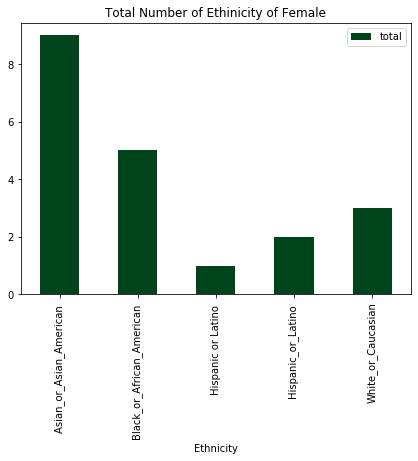

In [34]:
res_7.plot.bar(x='Ethnicity', y='total' , colormap='BuGn_r', title='Total Number of Ethinicity of Female')
plt.gcf().set_size_inches(7, 5)

plt.show()

# Q8- Find total number of male , female whose occupation is healthcare of all Ages with visualization

In [35]:

query_8 = '''SELECT sum("Index") as total , Age,Gender  FROM df where "Occupation" = "Healthcare"   group by "Age";'''

res_8 = pysqldf(query_8)
res_8

,total,Age,Gender
0,3,18-24,F
1,7,25-34,F
2,2,35-44,F
3,1,45-54,M
4,1,55-64,F


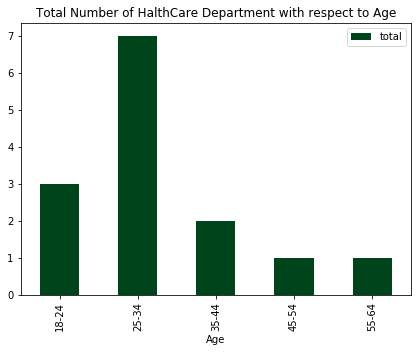

In [36]:
res_8.plot.bar(x='Age', y='total' , colormap='BuGn_r', title='Total Number of HalthCare Department with respect to Age')
plt.gcf().set_size_inches(7, 5)

plt.show()

In [37]:
# Q9- find people who are suffering with anxiety with their education

In [38]:

query_9 = '''SELECT sum("Index") as total , Age,Education  FROM df where "Suffering_With_Anxiety" = "Yes"   group by "Education";'''

res_9 = pysqldf(query_9)
res_9

,total,Age,Education
0,1,25-34,1 year of college
1,3,18-24,2 years of college
2,2,18-24,3 years of college
3,3,25-34,Completed graduate school
4,13,18-24,Graduated from college
5,2,35-44,Graduated from high school
6,4,18-24,Some graduate school


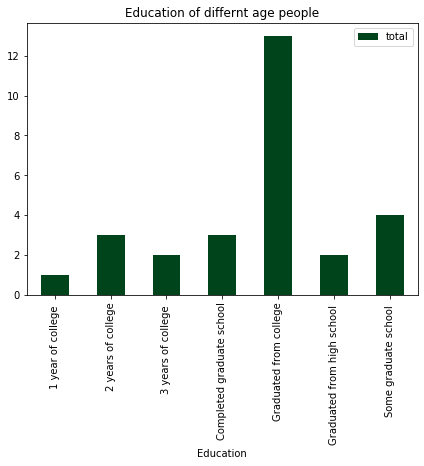

In [39]:
res_9.plot.bar(x='Education', y='total' , colormap='BuGn_r', title='Education of differnt age people')
plt.gcf().set_size_inches(7, 5)

plt.show()

In [40]:
# Q 10- Find the total number of people who are suffering with anxiety of all ages with visualization

In [41]:

query_10 = '''SELECT sum("Index") as total , Age,Gender  FROM df where "Suffering_With_Anxiety" = "Yes"   group by "Smoker";'''

res_10 = pysqldf(query_10)
res_10

,total,Age,Gender
0,19,18-24,F
1,9,25-34,M


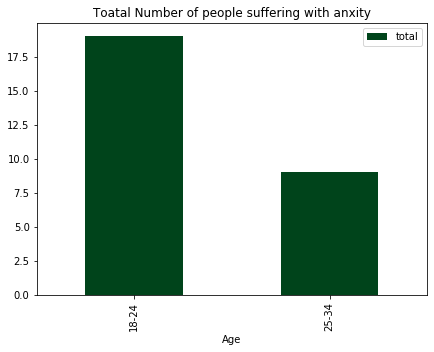

In [42]:
res_10.plot.bar(x='Age', y='total' , colormap='BuGn_r', title='Toatal Number of people suffering with anxity')
plt.gcf().set_size_inches(7, 5)

plt.show()

# 1- Machine Learning Algorithm Decision Tree
 

 <b> we will take these 4 variables as x  dependent [Occupation1,Gender1,Smoker1,Age1]
    while will predict [Suffering_With_Anxiety], which is yes or no <b>

In [43]:
df.head(2)

,Index,Suffering_With_Anxiety,Education,Age,Gender,Ethnicity,Occupation,Underlying_Conditions,Smoker,Received_Professional_Treatment,Factors_Kept_You_From_Seeking_Professional_Help
0,1,No,1 year of college,25-34,F,Hispanic_or_Latino,Healthcare,No,No,NaN,NaN
1,1,Yes,2 years of college,18-24,F,Asian_or_Asian_American,Business and Financial,Obesity,No,No,Cultural Expectations


In [44]:
from sklearn.tree import DecisionTreeClassifier
X=df.drop(columns=['Education','Index','Underlying_Conditions','Received_Professional_Treatment','Factors_Kept_You_From_Seeking_Professional_Help'])

In [45]:
X.head()

,Suffering_With_Anxiety,Age,Gender,Ethnicity,Occupation,Smoker
0,No,25-34,F,Hispanic_or_Latino,Healthcare,No
1,Yes,18-24,F,Asian_or_Asian_American,Business and Financial,No
2,Yes,18-24,M,Asian_or_Asian_American,Computer/IT,No
3,Yes,18-24,F,Asian_or_Asian_American,Healthcare,No
4,No,25-34,F,Asian_or_Asian_American,Healthcare,Yes


In [46]:
df['Gender'].value_counts()

F    20
M    17
Name: Gender, dtype: int64

In [47]:
df['Ethnicity'].value_counts()

Asian_or_Asian_American       15
Black_or_African_American      8
Hispanic_or_Latino             7
White_or_Caucasian             5
Hispanic or Latino             1
White or Caucasian             1
Name: Ethnicity, dtype: int64

In [48]:
df['Occupation'].value_counts()

Healthcare                14
Computer/IT                5
Unemployed                 3
Sales                      3
Construction               3
Education/Training         3
Enginerring                2
Legal                      1
Arts/Design                1
Social Services            1
Business and Financial     1
Name: Occupation, dtype: int64

In [49]:
df['Smoker'].value_counts()

No     27
Yes    10
Name: Smoker, dtype: int64

<b> will create dictionaries and classify all data of these 4 dependent columns <b>

In [50]:
dic = {
    'Healthcare':11,
    "Computer/IT":10,
    "Sales":9,
    "Unemployed":8,
    "Construction":7,
    "Education/Training":6,
    "Enginerring":5,
    "Social Services":4,
    "Legal":3,
    "Arts/Design":2,
    "Business and Financial":1
    
    
}
             

dic1 = {
    "Asian_or_Asian_American":4,
    "Black_or_African_American":3,
    "Hispanic_or_Latino":2,
    "White_or_Caucasian":1
    
    
}

dic2 = {
    
    "M":2,
    "F":1    
    
}

dic3 = {
    
    "Yes":2,
    "No":1    
    
}
dic4 = {
    "25-34":7,
    "35-44":6,
    "18-24":5,
    "55-64":4,
    "45-54":3,
    "65+":2,
    "Under 18":1
    
    
    
}


In [51]:
X['Occupation1'] = df.Occupation.map(dic)
#X['Ethnicity1'] = df.Ethnicity.map(dic1)
X['Gender1'] = df.Gender.map(dic2)
X['Smoker1'] = df.Smoker.map(dic3)
X['Age1'] = df.Age.map(dic4)




X.head(2)

,Suffering_With_Anxiety,Age,Gender,Ethnicity,Occupation,Smoker,Occupation1,Gender1,Smoker1,Age1
0,No,25-34,F,Hispanic_or_Latino,Healthcare,No,11.0,1,1,7
1,Yes,18-24,F,Asian_or_Asian_American,Business and Financial,No,1.0,1,1,5


In [52]:
x=X.drop(columns=['Suffering_With_Anxiety','Age','Gender','Ethnicity','Occupation','Smoker'])
x.head()

,Occupation1,Gender1,Smoker1,Age1
0,11.0,1,1,7
1,1.0,1,1,5
2,10.0,2,1,5
3,11.0,1,1,5
4,11.0,1,2,7


In [53]:
y=X['Suffering_With_Anxiety']

In [54]:
y.head()

0     No
1    Yes
2    Yes
3    Yes
4     No
Name: Suffering_With_Anxiety, dtype: object

In [55]:
x['Occupation1'] = x['Occupation1'].fillna(1)


In [56]:
x['Occupation1'].astype(int)

0     11
1      1
2     10
3     11
4     11
6     11
7      8
8     11
9     11
10     8
11    11
12    10
13    11
15     2
16    11
17    10
18    11
19     9
20     8
21     6
22    11
23    11
24     5
25    10
26     7
27     6
28     9
29     7
30     5
31    11
33     9
34    10
35    11
36     1
37     6
38     4
39     7
Name: Occupation1, dtype: int32

In [57]:
x['Occupation1'].head(20)

0     11.0
1      1.0
2     10.0
3     11.0
4     11.0
6     11.0
7      8.0
8     11.0
9     11.0
10     8.0
11    11.0
12    10.0
13    11.0
15     2.0
16    11.0
17    10.0
18    11.0
19     9.0
20     8.0
21     6.0
Name: Occupation1, dtype: float64

In [58]:
x['Occupation1'].tail(20)

19     9.0
20     8.0
21     6.0
22    11.0
23    11.0
24     5.0
25    10.0
26     7.0
27     6.0
28     9.0
29     7.0
30     5.0
31    11.0
33     9.0
34    10.0
35    11.0
36     1.0
37     6.0
38     4.0
39     7.0
Name: Occupation1, dtype: float64

In [59]:
x.shape

(37, 4)

In [60]:
x['Occupation1'].tail(20)

19     9.0
20     8.0
21     6.0
22    11.0
23    11.0
24     5.0
25    10.0
26     7.0
27     6.0
28     9.0
29     7.0
30     5.0
31    11.0
33     9.0
34    10.0
35    11.0
36     1.0
37     6.0
38     4.0
39     7.0
Name: Occupation1, dtype: float64

In [61]:
model=DecisionTreeClassifier()
model.fit(x,y)
predictions=model.predict([[1,1,1,1]]) # giving 4 Independent values for output yes or No anxiety
predictions

array(['No'], dtype=object)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X=x
Y=df['Suffering_With_Anxiety']
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2)
model=DecisionTreeClassifier()
model.fit(X_train, Y_train)  
predictions=model.predict(X_test)
score=accuracy_score(Y_test, predictions)
score

0.75

In [63]:
# Accuracy is 0.625

#  Machine Learning Algorithm Random forest

In [64]:
X.head()

,Occupation1,Gender1,Smoker1,Age1
0,11.0,1,1,7
1,1.0,1,1,5
2,10.0,2,1,5
3,11.0,1,1,5
4,11.0,1,2,7


In [65]:
#ydic={
 #   "Yes":2,
  #  "No":1    
#}

#y =df.Suffering_With_Anxiety.map(ydic)


In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [67]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [68]:
from sklearn.ensemble import RandomForestClassifier
>>> from sklearn.datasets import make_classification

regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [69]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[0 1]
 [1 6]]
              precision    recall  f1-score   support

          No       0.00      0.00      0.00         1
         Yes       0.86      0.86      0.86         7

    accuracy                           0.75         8
   macro avg       0.43      0.43      0.43         8
weighted avg       0.75      0.75      0.75         8

0.75


In [70]:
# Accuracy is 0.75